## BOSTON HOUSING PREDICTION : LINEAR REGRESSION

👋 Welcome to my Google Colab notebook where I'm excited to showcase my latest project on 🏠 housing price prediction using linear regression!

🔍 I explored the Boston Housing Dataset and cleaned the data by handling missing values and outliers using winsorization.

🧪 Next, I performed feature engineering and selection to identify the most significant variables that affect housing prices.

💻 I then implemented the linear regression model and evaluated its performance using various metrics such as R-squared, mean squared error, and root mean squared error.

📈 Finally, I made predictions on new data and visualized the results using Matplotlib.

🤖 This project has helped me sharpen my skills in data cleaning, feature selection, linear regression modeling, and data visualization. I'm excited to continue exploring more advanced techniques in machine learning and data science!

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
def load_data(file_path):
    """Loads the Boston dataset into a Pandas dataframe."""
    return pd.read_csv(file_path)

def data_exploration(df):
    """Performs data exploration on the dataframe."""
    print("\nData summary:")
    print(df.head())
    print("\nStatistics of numerical features:")
    print(df.describe())
    print("\nInformation about the features:")
    print(df.info())    

def handle_missing_values(df):
    """Handles missing values in the dataframe."""
    if df.isna().any().any():
        df = df.dropna()
    return df

def treat_outliers(df):
    """Treats outliers in the dataframe."""
    for col in df.columns:
        if df[col].dtype == np.number:
            mean = df[col].mean()
            std = df[col].std()
            z_scores = [(val - mean) / std for val in df[col]]
            for i, z_score in enumerate(z_scores):
                if abs(z_score) > 3:
                    df[col][i] = mean
    return df

def feature_scaling(df):
    """Scales the features in the dataframe."""
    scaler = StandardScaler()
    df[df.columns] = scaler.fit_transform(df[df.columns])
    return df

In [ ]:
if __name__ == "__main__":
    file_path = "boston_data.csv"
    df = load_data(file_path)
    df1 = handle_missing_values(df)
    df2 = treat_outliers(df1)
    df3 = feature_scaling(df2)
    df3.to_csv("Boston_preprocessed.csv", index=False)

<ipython-input-6-d50a66ef9eae>:23: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number:


In [ ]:
#Load file
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.543184,-0.479039,-0.055815,-0.272888,-1.226456,-0.560375,-1.823018,0.808827,-0.661465,-0.624412,0.351757,0.086579,-0.387152,0.028462
1,-0.554561,1.221180,-0.890315,-0.272888,-0.885087,-0.617017,-0.763492,1.652886,-0.208145,-0.747319,0.584572,0.458514,-0.484977,-0.256121
2,-0.504092,-0.479039,-0.189511,-0.272888,-0.108473,-0.542049,0.288900,-0.312410,-0.661465,-0.630265,-0.020746,0.446216,-0.373812,-0.161260
3,-0.015111,-0.479039,1.232665,-0.272888,2.682216,-1.166777,0.938172,-1.121622,-0.548135,-0.050849,-1.743574,-0.380948,1.327743,-0.825287
4,-0.566846,0.949145,-0.815386,-0.272888,-1.004566,-0.303820,-0.199838,1.592687,-0.661465,-0.987279,-0.765753,0.403917,-0.453851,-0.134157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.337286,-0.479039,1.015225,-0.272888,1.333809,-0.187204,1.073735,-0.743959,1.605132,1.488408,0.817387,0.458514,0.835656,-1.001458
400,0.189322,-0.479039,1.015225,-0.272888,0.343840,-0.900226,1.120111,-1.179460,1.605132,1.488408,0.817387,-0.320980,-0.353062,-0.879493
401,-0.572662,0.235726,-1.466237,3.664502,-1.328866,2.708198,-1.562596,1.115566,-1.001454,-1.250650,-2.255766,0.432800,-1.383185,0.111449
402,-0.571526,0.235726,-1.535289,-0.272888,-1.252058,0.142652,-1.173746,2.810457,-0.888125,-0.577591,-0.532938,0.458514,-0.996333,0.435009


In [ ]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [ ]:
 data_exploration(df)


Data summary:
       crim        zn     indus      chas       nox        rm       age  \
0 -0.543184 -0.479039 -0.055815 -0.272888 -1.226456 -0.560375 -1.823018   
1 -0.554561  1.221180 -0.890315 -0.272888 -0.885087 -0.617017 -0.763492   
2 -0.504092 -0.479039 -0.189511 -0.272888 -0.108473 -0.542049  0.288900   
3 -0.015111 -0.479039  1.232665 -0.272888  2.682216 -1.166777  0.938172   
4 -0.566846  0.949145 -0.815386 -0.272888 -1.004566 -0.303820 -0.199838   

        dis       rad       tax   ptratio     black     lstat      medv  
0  0.808827 -0.661465 -0.624412  0.351757  0.086579 -0.387152  0.028462  
1  1.652886 -0.208145 -0.747319  0.584572  0.458514 -0.484977 -0.256121  
2 -0.312410 -0.661465 -0.630265 -0.020746  0.446216 -0.373812 -0.161260  
3 -1.121622 -0.548135 -0.050849 -1.743574 -0.380948  1.327743 -0.825287  
4  1.592687 -0.661465 -0.987279 -0.765753  0.403917 -0.453851 -0.134157  

Statistics of numerical features:
               crim            zn         indus        

In [ ]:
df.shape

(404, 14)

In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

There are no Null values present.



In [ ]:
#Handle missing values, if any
df1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.543184,-0.479039,-0.055815,-0.272888,-1.226456,-0.560375,-1.823018,0.808827,-0.661465,-0.624412,0.351757,0.086579,-0.387152,0.028462
1,-0.554561,1.221180,-0.890315,-0.272888,-0.885087,-0.617017,-0.763492,1.652886,-0.208145,-0.747319,0.584572,0.458514,-0.484977,-0.256121
2,-0.504092,-0.479039,-0.189511,-0.272888,-0.108473,-0.542049,0.288900,-0.312410,-0.661465,-0.630265,-0.020746,0.446216,-0.373812,-0.161260
3,-0.015111,-0.479039,1.232665,-0.272888,2.682216,-1.166777,0.938172,-1.121622,-0.548135,-0.050849,-1.743574,-0.380948,1.327743,-0.825287
4,-0.566846,0.949145,-0.815386,-0.272888,-1.004566,-0.303820,-0.199838,1.592687,-0.661465,-0.987279,-0.765753,0.403917,-0.453851,-0.134157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.337286,-0.479039,1.015225,-0.272888,1.333809,-0.187204,1.073735,-0.743959,1.605132,1.488408,0.817387,0.458514,0.835656,-1.001458
400,0.189322,-0.479039,1.015225,-0.272888,0.343840,-0.900226,1.120111,-1.179460,1.605132,1.488408,0.817387,-0.320980,-0.353062,-0.879493
401,-0.572662,0.235726,-1.466237,3.664502,-1.328866,2.708198,-1.562596,1.115566,-1.001454,-1.250650,-2.255766,0.432800,-1.383185,0.111449
402,-0.571526,0.235726,-1.535289,-0.272888,-1.252058,0.142652,-1.173746,2.810457,-0.888125,-0.577591,-0.532938,0.458514,-0.996333,0.435009


In a boxplot, outliers are defined as points that are more than 1.5 times the interquartile range (IQR) away from the upper or lower quartile. In other words, an outlier is any point that falls outside the range of Q1 - 1.5IQR to Q3 + 1.5IQR, where Q1 and Q3 are the 25th and 75th percentiles, respectively, and IQR is the difference between Q3 and Q1.

In [ ]:
#Handle Outliers
df2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.543184,-0.479039,-0.055815,-0.272888,-1.226456,-0.560375,-1.823018,0.808827,-0.661465,-0.624412,0.351757,0.086579,-0.387152,0.028462
1,-0.554561,1.221180,-0.890315,-0.272888,-0.885087,-0.617017,-0.763492,1.652886,-0.208145,-0.747319,0.584572,0.458514,-0.484977,-0.256121
2,-0.504092,-0.479039,-0.189511,-0.272888,-0.108473,-0.542049,0.288900,-0.312410,-0.661465,-0.630265,-0.020746,0.446216,-0.373812,-0.161260
3,-0.015111,-0.479039,1.232665,-0.272888,2.682216,-1.166777,0.938172,-1.121622,-0.548135,-0.050849,-1.743574,-0.380948,1.327743,-0.825287
4,-0.566846,0.949145,-0.815386,-0.272888,-1.004566,-0.303820,-0.199838,1.592687,-0.661465,-0.987279,-0.765753,0.403917,-0.453851,-0.134157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.337286,-0.479039,1.015225,-0.272888,1.333809,-0.187204,1.073735,-0.743959,1.605132,1.488408,0.817387,0.458514,0.835656,-1.001458
400,0.189322,-0.479039,1.015225,-0.272888,0.343840,-0.900226,1.120111,-1.179460,1.605132,1.488408,0.817387,-0.320980,-0.353062,-0.879493
401,-0.572662,0.235726,-1.466237,3.664502,-1.328866,2.708198,-1.562596,1.115566,-1.001454,-1.250650,-2.255766,0.432800,-1.383185,0.111449
402,-0.571526,0.235726,-1.535289,-0.272888,-1.252058,0.142652,-1.173746,2.810457,-0.888125,-0.577591,-0.532938,0.458514,-0.996333,0.435009


In [ ]:
#Feature Scaling
df3

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.543184,-0.479039,-0.055815,-0.272888,-1.226456,-0.560375,-1.823018,0.808827,-0.661465,-0.624412,0.351757,0.086579,-0.387152,0.028462
1,-0.554561,1.221180,-0.890315,-0.272888,-0.885087,-0.617017,-0.763492,1.652886,-0.208145,-0.747319,0.584572,0.458514,-0.484977,-0.256121
2,-0.504092,-0.479039,-0.189511,-0.272888,-0.108473,-0.542049,0.288900,-0.312410,-0.661465,-0.630265,-0.020746,0.446216,-0.373812,-0.161260
3,-0.015111,-0.479039,1.232665,-0.272888,2.682216,-1.166777,0.938172,-1.121622,-0.548135,-0.050849,-1.743574,-0.380948,1.327743,-0.825287
4,-0.566846,0.949145,-0.815386,-0.272888,-1.004566,-0.303820,-0.199838,1.592687,-0.661465,-0.987279,-0.765753,0.403917,-0.453851,-0.134157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.337286,-0.479039,1.015225,-0.272888,1.333809,-0.187204,1.073735,-0.743959,1.605132,1.488408,0.817387,0.458514,0.835656,-1.001458
400,0.189322,-0.479039,1.015225,-0.272888,0.343840,-0.900226,1.120111,-1.179460,1.605132,1.488408,0.817387,-0.320980,-0.353062,-0.879493
401,-0.572662,0.235726,-1.466237,3.664502,-1.328866,2.708198,-1.562596,1.115566,-1.001454,-1.250650,-2.255766,0.432800,-1.383185,0.111449
402,-0.571526,0.235726,-1.535289,-0.272888,-1.252058,0.142652,-1.173746,2.810457,-0.888125,-0.577591,-0.532938,0.458514,-0.996333,0.435009


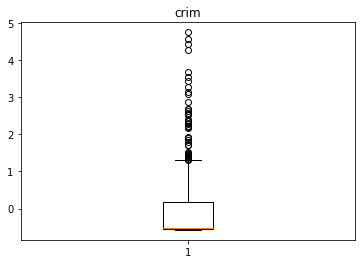

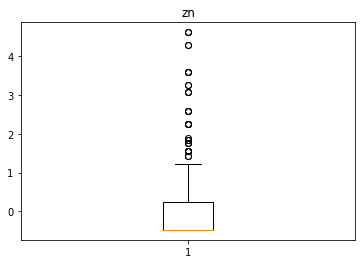

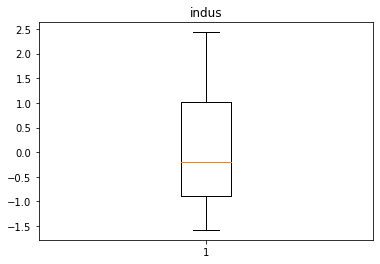

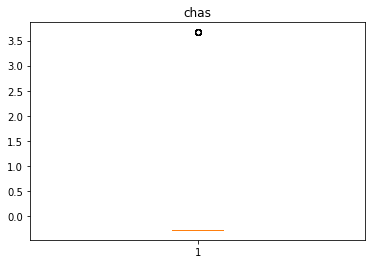

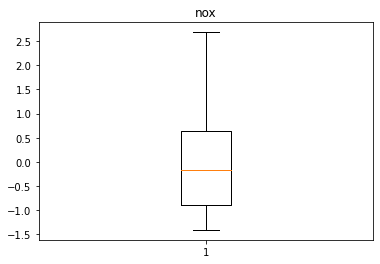

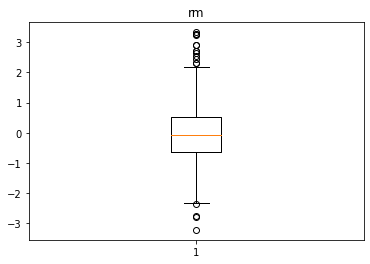

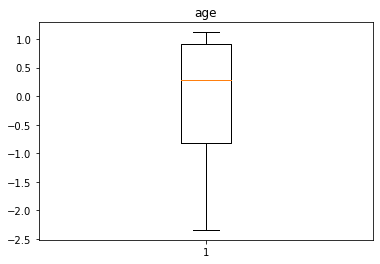

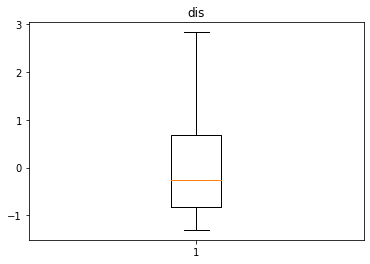

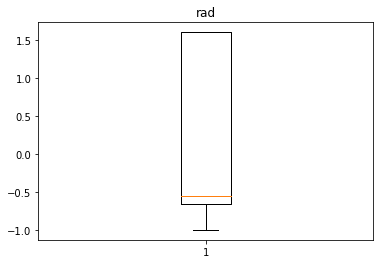

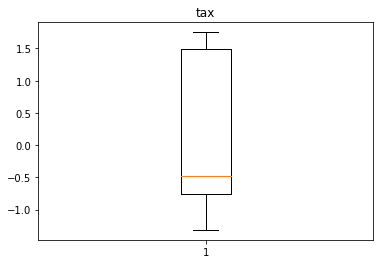

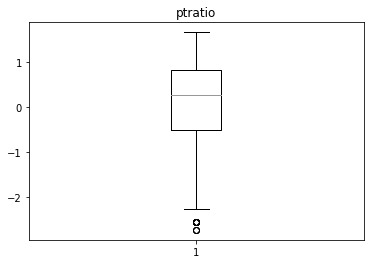

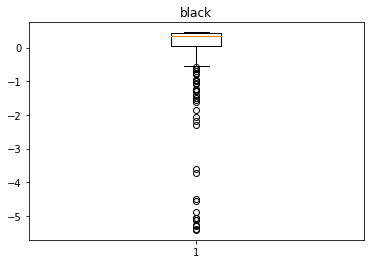

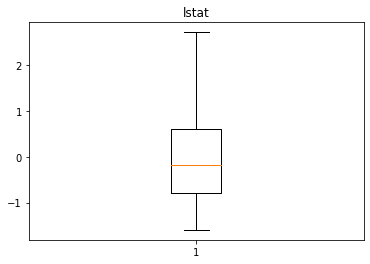

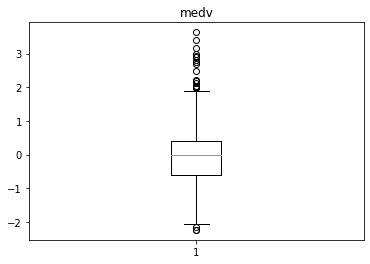

In [ ]:
#Plotting all the Boxplot for features
import matplotlib.pyplot as plt

for column in df.columns:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(column)

plt.show()

From the variables above we can see that :

Variables without Outliers -
age,nox,indus,rad,tax

Variables with Outliers - 
crim, zn, chas, rm, dis, ptratio, black, lstat, medv

## Outlier Treatment

In [ ]:
# For Variable Crim : Replace outliers with maximum values (Winsorization)
from scipy.stats.mstats import winsorize


# Select the variable of interest (crime rate)
var = df['crim'].values.astype(float)

# Winsorization
q1, q3 = np.percentile(var, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorized = np.clip(var, lower_bound, upper_bound)

# Quantile-based outlier detection
q25, q75 = np.percentile(var_winsorized, [25, 75])
iqr = q75 - q25
lower_bound = q25 - 1.5*iqr
upper_bound = q75 + 1.5*iqr
outliers = var_winsorized[(var_winsorized < lower_bound) | (var_winsorized > upper_bound)]

print("Original variable: ", var)
print("Winsorized variable: ", var_winsorized)
print("Outliers: ", outliers)

Original variable:  [-5.43184349e-01 -5.54561093e-01 -5.04091658e-01 -1.51110762e-02
 -5.66846254e-01 -5.58576173e-01 -5.36628572e-01 -5.20500581e-01
  1.48763829e+00 -2.85815247e-01  4.74364687e+00 -5.56767541e-01
 -3.70177045e-01 -5.53127722e-01  2.53650110e+00  5.94781246e-01
 -5.54639016e-01  2.50496283e+00 -2.36036865e-01 -2.83524724e-01
  1.33929564e+00 -4.54743903e-01 -5.57885120e-01 -5.62074501e-01
 -5.70617312e-01 -5.23744635e-01  5.86207676e-01 -5.71255050e-01
 -5.65857863e-01 -5.60885152e-01 -5.72788901e-01 -5.61615166e-01
 -5.58926826e-01 -5.10475184e-01  1.89322111e-01 -5.38502823e-01
 -5.64252242e-01 -4.83891170e-01  3.81651849e-01 -5.32599137e-01
  2.11043750e-01 -8.78316018e-02 -5.66589929e-01  6.17946906e-01
  2.98085685e-01 -5.30673621e-01  3.16024358e-01  1.49150407e-01
 -4.66212924e-01  1.71281498e+00  4.27356669e+00  1.30815314e+00
 -4.06511675e-01 -5.71275556e-01 -5.11078061e-01  5.99493531e-01
 -5.30240944e-01 -5.69280319e-01 -5.07977550e-01 -4.44919465e-01
  3.0

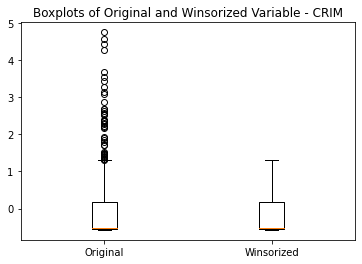

In [ ]:
import matplotlib.pyplot as plt

# Create a list of the original variable and the Winsorized variable
data = [var, var_winsorized]

# Plot boxplots of both variables
plt.boxplot(data)
plt.xticks([1, 2], ['Original', 'Winsorized'])
plt.title("Boxplots of Original and Winsorized Variable - CRIM")
plt.show()

In [ ]:
# For Variable Crim : Replace outliers with maximum values (Winsorization)
from scipy.stats.mstats import winsorize


# Select the variable of interest (crime rate)
varzn = df['zn'].values.astype(float)

# Winsorization
q1, q3 = np.percentile(varzn, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorizedzn= np.clip(var, lower_bound, upper_bound)

# Quantile-based outlier detection
q25, q75 = np.percentile(var_winsorizedzn, [25, 75])
iqr = q75 - q25
lower_bound = q25 - 1.5*iqr
upper_bound = q75 + 1.5*iqr
outlierszn = var_winsorized[(var_winsorizedzn < lower_bound) | (var_winsorizedzn > upper_bound)]

print("Original variable: ", varzn)
print("Winsorized variable: ", var_winsorizedzn)
print("Outliers: ", outlierszn)

Original variable:  [-0.47903875  1.22117968 -0.47903875 -0.47903875  0.94914473  2.58135443
  1.01715347 -0.47903875 -0.47903875 -0.47903875 -0.47903875  1.56122337
 -0.47903875  1.22117968 -0.47903875 -0.47903875  1.56122337 -0.47903875
 -0.47903875 -0.47903875 -0.47903875 -0.47903875 -0.47903875 -0.47903875
 -0.47903875 -0.47903875 -0.47903875  3.60148548  0.23572634  3.60148548
  3.60148548 -0.47903875 -0.47903875 -0.47903875 -0.47903875 -0.47903875
 -0.47903875 -0.47903875 -0.47903875  0.88113599 -0.47903875 -0.47903875
  1.22117968 -0.47903875 -0.47903875 -0.47903875 -0.47903875 -0.47903875
  0.88113599 -0.47903875 -0.47903875 -0.47903875  0.88113599  0.23572634
 -0.47903875 -0.47903875  0.88113599  0.23572634 -0.47903875 -0.47903875
 -0.47903875 -0.47903875 -0.47903875  1.76524958  1.42520589 -0.47903875
  1.83325832 -0.47903875 -0.47903875 -0.47903875  0.23572634 -0.47903875
 -0.47903875 -0.47903875  1.76524958 -0.47903875 -0.47903875 -0.47903875
  3.09141996 -0.47903875 -0.479

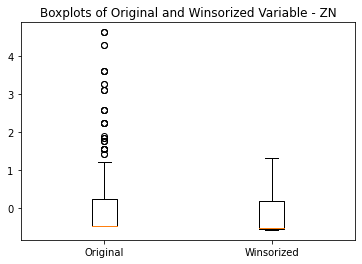

In [ ]:
import matplotlib.pyplot as plt

# Create a list of the original variable and the Winsorized variable
data = [varzn, var_winsorizedzn]

# Plot boxplots of both variables
plt.boxplot(data)
plt.xticks([1, 2], ['Original', 'Winsorized'])
plt.title("Boxplots of Original and Winsorized Variable - ZN")
plt.show()

In [ ]:
# For Variable CHAS : Replace outliers with maximum values (Winsorization)
from scipy.stats.mstats import winsorize


# Select the variable of interest chas
varchas = df['chas'].values.astype(float)

# Winsorization
q1, q3 = np.percentile(varchas, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorizedchas= np.clip(varchas, lower_bound, upper_bound)

# Quantile-based outlier detection
q25, q75 = np.percentile(var_winsorizedchas, [25, 75])
iqr = q75 - q25
lower_bound = q25 - 1.5*iqr
upper_bound = q75 + 1.5*iqr
outlierschas = var_winsorized[(var_winsorizedchas < lower_bound) | (var_winsorizedchas > upper_bound)]

print("Original variable: ", varchas)
print("Winsorized variable: ", var_winsorizedchas)
print("Outliers: ", outlierschas)

Original variable:  [-0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841
 -0.27288841 -0.27288841 -0.27288841  3.66450153 -0.27288841 -0.27288841
 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841
 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841
 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841
 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841
 -0.27288841  3.66450153 -0.27288841 -0.27288841 -0.27288841 -0.27288841
 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841  3.66450153
 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841
 -0.27288841 -0.27288841  3.66450153 -0.27288841 -0.27288841 -0.27288841
 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841
 -0.27288841  3.66450153 -0.27288841 -0.27288841 -0.27288841  3.66450153
 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841 -0.27288841
 -0.27288841  3.66450153 -0.272

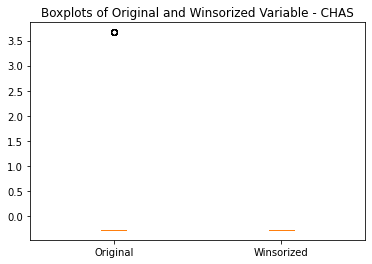

In [ ]:
import matplotlib.pyplot as plt

# Create a list of the original variable and the Winsorized variable
data = [varchas, var_winsorizedchas]

# Plot boxplots of both variables
plt.boxplot(data)
plt.xticks([1, 2], ['Original', 'Winsorized'])
plt.title("Boxplots of Original and Winsorized Variable - CHAS")
plt.show()

In [ ]:
# For Variable rm : Replace outliers with maximum values (Winsorization)
from scipy.stats.mstats import winsorize


# Select the variable of interest rm
varrm = df['rm'].values.astype(float)

# Winsorization
q1, q3 = np.percentile(varrm, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorizedrm= np.clip(varrm, lower_bound, upper_bound)

# Quantile-based outlier detection
q25, q75 = np.percentile(var_winsorizedrm, [25, 75])
iqr = q75 - q25
lower_bound = q25 - 1.5*iqr
upper_bound = q75 + 1.5*iqr
outliersrm = var_winsorized[(var_winsorizedrm < lower_bound) | (var_winsorizedrm > upper_bound)]

print("Original variable: ", varrm)
print("Winsorized variable: ", var_winsorizedrm)
print("Outliers: ", outliersrm)

Original variable:  [-5.60374828e-01 -6.17016769e-01 -5.42049494e-01 -1.16677679e+00
 -3.03820154e-01  1.47873505e+00  7.00741331e-01 -5.22632975e-02
  8.92324367e-01 -2.80497001e-01 -1.65489704e+00  5.14156113e-01
  6.27439996e-01  2.64265197e-01 -2.42180394e-01  7.54051393e-01
  1.01003131e-01 -1.65489704e+00 -2.92158577e-01  3.54225927e-01
  1.37653799e-01  1.24326284e-01 -2.62171667e-01  4.14199747e-01
  4.04204110e-01 -9.86855326e-01 -1.30562451e-01  8.37348366e-01
 -3.15481730e-01 -6.88652165e-01  5.10824235e-01 -2.55507910e-01
 -4.80409735e-01 -6.38673982e-01 -1.40667207e+00  1.30990041e-01
  2.55493193e+00  7.14068847e-01 -5.35385736e-01  8.57339639e-01
 -7.72523891e-02 -2.78831062e-01  5.35813326e-01  3.59223745e-01
 -3.08817972e-01 -1.15844709e+00 -2.17191302e-01 -2.42180394e-01
  2.03682477e+00  5.52472721e-01  1.37653799e-01 -1.26839909e+00
  1.71529845e+00  2.18675932e+00  3.27961559e+00  1.27215856e+00
  2.32170041e+00  1.12888777e+00 -3.52132397e-01 -3.35473003e-01
 -1.2

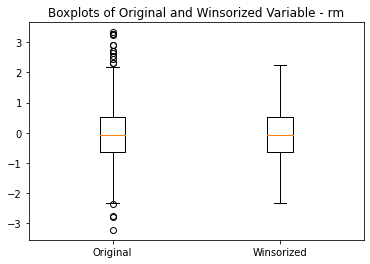

In [ ]:
import matplotlib.pyplot as plt

# Create a list of the original variable and the Winsorized variable
data = [varrm, var_winsorizedrm]

# Plot boxplots of both variables
plt.boxplot(data)
plt.xticks([1, 2], ['Original', 'Winsorized'])
plt.title("Boxplots of Original and Winsorized Variable - rm")
plt.show()

In [ ]:
# For Variable dis : Replace outliers with maximum values (Winsorization)
from scipy.stats.mstats import winsorize


# Select the variable of interest rm
vardis = df['dis'].values.astype(float)

# Winsorization
q1, q3 = np.percentile(vardis, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorizeddis= np.clip(vardis, lower_bound, upper_bound)

# Quantile-based outlier detection
q25, q75 = np.percentile(var_winsorizedrm, [25, 75])
iqr = q75 - q25
lower_bound = q25 - 1.5*iqr
upper_bound = q75 + 1.5*iqr
outliersdis = var_winsorized[(var_winsorizeddis < lower_bound) | (var_winsorizeddis > upper_bound)]

print("Original variable: ", vardis)
print("Winsorized variable: ", var_winsorizeddis)
print("Outliers: ", outliersdis)

Original variable:  [ 0.80882728  1.65288572 -0.31240995 -1.12162217  1.59268747  0.43901607
  2.11194224 -0.23014414 -0.83294772 -1.00681955 -1.05911453  1.27204072
  0.27084074  1.80350963 -0.92224435 -0.19478473  1.70600182 -0.82653273
 -1.0742539  -0.99835176 -0.8945316  -0.71019051  0.19463069 -0.29711662
  1.31155705  0.11996023 -0.87574852  1.28728273  2.82723904  0.04537514
  1.28728273 -0.57137017  0.91937035  0.1474677  -1.14014865  0.42551893
 -0.2627836  -0.0304584  -0.58024852  0.19986532 -0.72656156 -1.17632918
  0.86702405 -0.46683153 -0.61694225  1.21959178 -0.347872   -1.00882102
 -0.80646665 -0.81421595 -1.19326475 -1.09355018 -0.83777179  1.31314796
 -0.41920666 -0.15429333  0.33627362  2.02310749 -0.0304584   0.38523281
 -1.19326475 -0.64588667 -0.96304367 -0.27125138 -0.02327362  0.64450095
  0.91372516 -0.03009916 -0.95529436 -0.67862877  1.31314796 -1.2083528
 -0.47904567 -0.65604801 -0.3141035  -0.61227214 -0.31774722 -1.06635063
  1.85056998 -0.92711974  0.0437

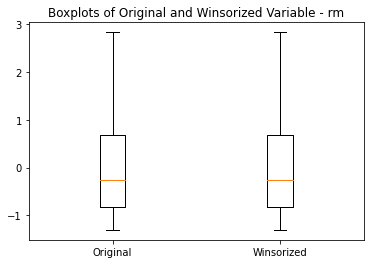

In [ ]:
import matplotlib.pyplot as plt

# Create a list of the original variable and the Winsorized variable
data = [vardis, var_winsorizeddis]

# Plot boxplots of both variables
plt.boxplot(data)
plt.xticks([1, 2], ['Original', 'Winsorized'])
plt.title("Boxplots of Original and Winsorized Variable - rm")
plt.show()

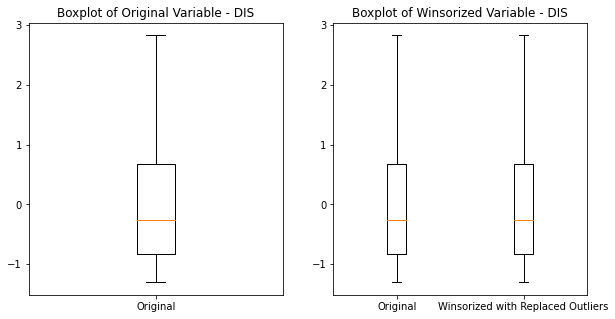

In [ ]:
#Winsorization for variable dis
var_dis = df['dis'].values.astype(float)

q1, q3 = np.percentile(var_dis, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorized_dis = np.clip(var_dis, lower_bound, upper_bound)

#Replace outliers with maximum values
q1, q3 = np.percentile(var_dis, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
caps = np.percentile(var_dis, [7, 93], axis=0)
w = 1.5*iqr
var_dis[var_dis < (q1 - w)] = caps[0]
var_dis[var_dis > (q3 + w)] = caps[1]

#Winsorization for variable dis with replaced outliers
q1, q3 = np.percentile(var_dis, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorized_dis_outliers = np.clip(var_dis, lower_bound, upper_bound)

#create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#plot original dis variable
axs[0].boxplot(var_dis)
axs[0].set_xticklabels(['Original'])
axs[0].set_title('Boxplot of Original Variable - DIS')

#plot winsorized dis variable
axs[1].boxplot([var_dis, var_winsorized_dis_outliers])
axs[1].set_xticklabels(['Original', 'Winsorized with Replaced Outliers'])
axs[1].set_title('Boxplot of Winsorized Variable - DIS')

#show plot
plt.show()

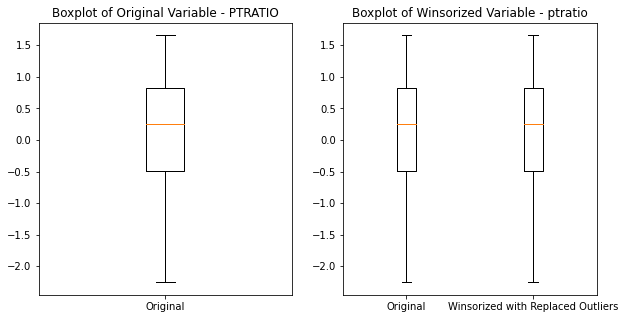

In [ ]:
#Winsorization for variable ptratio
varptratio = df['ptratio'].values.astype(float)
q1, q3 = np.percentile(varptratio, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorizedptratio = np.clip(varptratio, lower_bound, upper_bound)

#Replace outliers with maximum values
q1, q3 = np.percentile(varptratio, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
caps = np.percentile(varptratio, [7, 93], axis=0)
w = 1.5*iqr
varptratio[varptratio < (q1 - w)] = caps[0]
varptratio[varptratio > (q3 + w)] = caps[1]

#Winsorization for variable dis with replaced outliers
q1, q3 = np.percentile(varptratio, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorized_varptratio_outliers = np.clip(varptratio, lower_bound, upper_bound)

#create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#plot original ptratio variable
axs[0].boxplot(varptratio)
axs[0].set_xticklabels(['Original'])
axs[0].set_title('Boxplot of Original Variable - PTRATIO')

#plot winsorized ptratio variable
axs[1].boxplot([varptratio, var_winsorized_varptratio_outliers])
axs[1].set_xticklabels(['Original', 'Winsorized with Replaced Outliers'])
axs[1].set_title('Boxplot of Winsorized Variable - ptratio')
#show plot
plt.show()

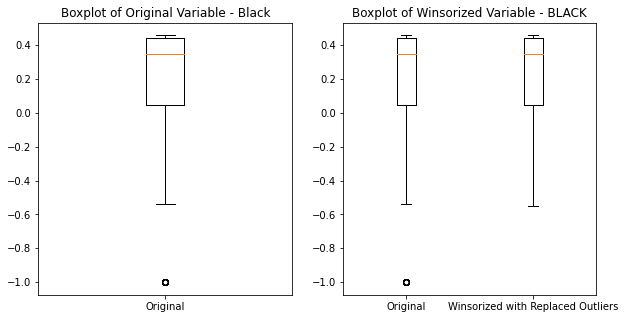

In [ ]:
#Winsorization for variable black
varblack = df['black'].values.astype(float)

q1, q3 = np.percentile(varblack, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorizedblack = np.clip(varblack, lower_bound, upper_bound)

#Replace outliers with maximum values
q1, q3 = np.percentile(varblack, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
caps = np.percentile(varblack, [7, 93], axis=0)
w = 1.5*iqr
varblack[varblack < (q1 - w)] = caps[0]
varblack[varblack > (q3 + w)] = caps[1]

#Winsorization for variable dis with replaced outliers
q1, q3 = np.percentile(varblack, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorized_black_outliers = np.clip(varblack, lower_bound, upper_bound)

#create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#plot original black variable
axs[0].boxplot(varblack)
axs[0].set_xticklabels(['Original'])
axs[0].set_title('Boxplot of Original Variable - Black')
#plot winsorizedblack variable
axs[1].boxplot([varblack, var_winsorized_black_outliers])
axs[1].set_xticklabels(['Original', 'Winsorized with Replaced Outliers'])
axs[1].set_title('Boxplot of Winsorized Variable - BLACK')
#show plot
plt.show()

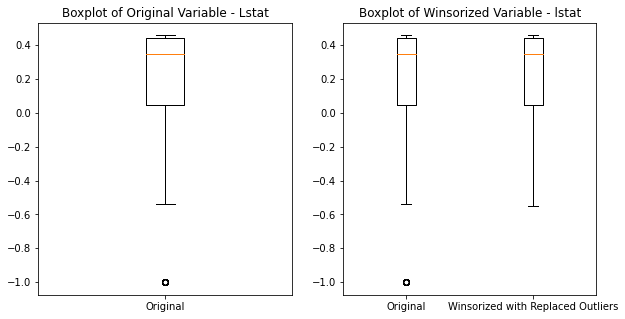

In [ ]:
#Winsorization for variable lstat
varlstat = df['lstat'].values.astype(float)

q1, q3 = np.percentile(varlstat, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorizedlstat = np.clip(varlstat, lower_bound, upper_bound)

#Replace outliers with maximum values
q1, q3 = np.percentile(varlstat, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
caps = np.percentile(varlstat, [7, 93], axis=0)
w = 1.5*iqr
varlstat[varlstat < (q1 - w)] = caps[0]
varlstat[varlstat > (q3 + w)] = caps[1]

#Winsorization for variable dis with replaced outliers
q1, q3 = np.percentile(varlstat, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorized_lstat_outliers = np.clip(varlstat, lower_bound, upper_bound)

#create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#plot original black variable
axs[0].boxplot(varblack)
axs[0].set_xticklabels(['Original'])
axs[0].set_title('Boxplot of Original Variable - Lstat')

#plot winsorizedblack variable
axs[1].boxplot([varblack, var_winsorized_black_outliers])
axs[1].set_xticklabels(['Original', 'Winsorized with Replaced Outliers'])
axs[1].set_title('Boxplot of Winsorized Variable - lstat')

#show plot
plt.show()

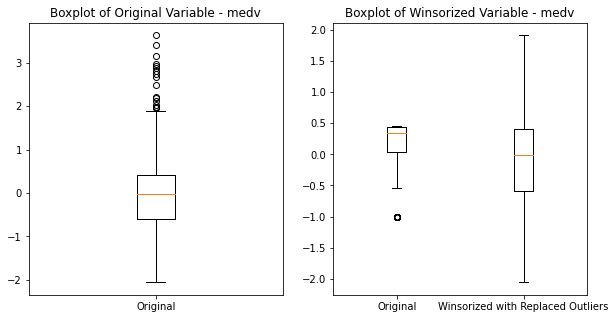

In [ ]:
#Winsorization for variable medv
varmedv = df['medv'].values.astype(float)

q1, q3 = np.percentile(varmedv, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorizedmedv = np.clip(varmedv, lower_bound, upper_bound)

#Replace outliers with maximum values
q1, q3 = np.percentile(varmedv, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
caps = np.percentile(varmedv, [7, 93], axis=0)
w = 1.5*iqr
varmedv[varmedv < (q1 - w)] = caps[0]
varlstat[varmedv > (q3 + w)] = caps[1]

#Winsorization for variable dis with replaced outliers
q1, q3 = np.percentile(varmedv, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
var_winsorized_medv_outliers = np.clip(varmedv, lower_bound, upper_bound)

#create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#plot original medv variable
axs[0].boxplot(varmedv)
axs[0].set_xticklabels(['Original'])
axs[0].set_title('Boxplot of Original Variable - medv')
#plot winsorizedmedv variable
axs[1].boxplot([varblack, var_winsorized_medv_outliers])
axs[1].set_xticklabels(['Original', 'Winsorized with Replaced Outliers'])
axs[1].set_title('Boxplot of Winsorized Variable - medv')
#show plot
plt.show()

In [ ]:
import statsmodels.api as sm

# Define the variables for the regression model
X = df[['rm', 'lstat', 'ptratio', 'chas','medv','black','ptratio','dis','zn','crim']]
y_winsorized = var_winsorized  # using the winsorized variable

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Create the OLS regression model
model_winsorized = sm.OLS(y_winsorized, X).fit()

# Print the summary of the model
print(model_winsorized.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     336.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          7.62e-179
Time:                        00:09:22   Log-Likelihood:                 25.828
No. Observations:                 404   AIC:                            -31.66
Df Residuals:                     394   BIC:                             8.359
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1201      0.011    -10.499      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#CONCLUSION

🏡📈 This is a multiple linear regression model fitted on the Boston Housing dataset 📊.

It predicts the median value of owner-occupied homes (medv) based on various features of the house 🏠. 


The R-squared value is 0.885, meaning that 88.5% of the variability in medv can be explained by the independent variables 📈.

Most variables have a low p-value (<0.05), indicating their statistical significance in predicting medv 💯. 

The coefficients of the variables represent the change in medv per unit change in the independent variable, holding all other independent variables constant 🤔. 

These insights can be used to predict the median value of new homes in Boston 🏠💰.